Focusing on the data available for all ages, **what does the distribution of unemployment rates look like among the different major categories?**  Come up with a _graphical display_ that allows a reader to easily make sense of the information.


In addition to the comprehensive, all-ages dataset, the github repository _also contains data regarding just **recent college graduates (ages < 28)**_. Comparing this subset of data to the whole dataset that it comes from (all-ages) can provide us with some information about recent trends. **Which majors appear to have experienced a relative boom** among recent graduates and **which majors are dropping off** in popularity? Again, explore visual ways of describing the answer as well as numerical ones.


In [314]:
import pandas as pd
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import pylab
import json
import collections
import pprint
pp = pprint.PrettyPrinter()
import warnings 
warnings.filterwarnings('ignore')

In [6]:
all_ages = pd.read_csv("data-college-majors/all-ages.csv")

In [50]:
grad_students = pd.read_csv("data-college-majors/grad-students.csv")

In [12]:
recent_grads = pd.read_csv("data-college-majors/recent-grads.csv")

In [13]:
majors_list = pd.read_csv("data-college-majors/majors-list.csv")

In [41]:
projected_occupation = pd.read_excel("data-college-majors/occupation.xlsx",sheet_name = 1)[:-4]
#data via https://www.bls.gov/emp/tables/emp-by-major-occupational-group.htm | 2019 - 2029 projections

In [218]:
# all_ages.groupby(["Major_category","Major","Employed","Unemployed","Unemployment_rate"]).mean()

In [10]:
all_ages.dtypes

Major_code                         int64
Major                             object
Major_category                    object
Total                              int64
Employed                           int64
Employed_full_time_year_round      int64
Unemployed                         int64
Unemployment_rate                float64
Median                             int64
P25th                              int64
P75th                            float64
dtype: object

In [219]:
# all_ages.groupby("Major_category").describe()["Unemployment_rate"].sort_values("max")

In [48]:
recent_grads.sample(5)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
148,149,6006,ART HISTORY AND CRITICISM,21030.0,3240.0,17790.0,Humanities & Liberal Arts,0.845934,204,17579,13262,6140,9965,1128,0.060298,31000,23000,40000,5139,9738,3426
54,55,4006,COGNITIVE SCIENCE AND BIOPSYCHOLOGY,3831.0,1667.0,2164.0,Biology & Life Science,0.564866,25,2741,2470,711,1584,223,0.075236,41000,20000,60000,1369,921,135
102,103,5503,CRIMINOLOGY,19879.0,10031.0,9848.0,Social Science,0.495397,214,16181,13616,4543,10548,1743,0.097244,35000,25000,45000,3373,10605,1895
127,128,6211,HOSPITALITY MANAGEMENT,43647.0,15204.0,28443.0,Business,0.651660,546,36728,32160,7494,23106,2393,0.061169,33000,25000,42000,2325,23341,9063
118,119,6110,COMMUNITY AND PUBLIC HEALTH,19735.0,4103.0,15632.0,Health,0.792095,130,14512,10099,6377,7460,1833,0.112144,34000,21000,45000,5225,7385,1854


In [51]:
grad_students.sample(5)

,Major_code,Major,Major_category,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,Grad_P25,Grad_P75,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium
28,2100,COMPUTER AND INFORMATION SYSTEMS,Computers & Mathematics,71527,1425,60858,53807,2539,0.040049,80000.0,55000,104000.0,242194,209994,184959,10439,0.047357,65000.0,45000,90000.0,0.227996,0.230769
146,2305,MATHEMATICS TEACHER EDUCATION,Education,80826,1194,51750,34672,748,0.014248,60000.0,47500,80000.0,63346,42354,27419,1610,0.036621,45000.0,35000,62000.0,0.560622,0.333333
1,6004,COMMERCIAL ART AND GRAPHIC DESIGN,Arts,53864,882,40492,29553,2482,0.057756,60000.0,40000,89000.0,461977,347166,250596,25484,0.068386,48000.0,34000,71000.0,0.104420,0.250000
112,5502,ANTHROPOLOGY AND ARCHEOLOGY,Humanities & Liberal Arts,107888,1971,83632,59545,4374,0.049701,65000.0,45100,100000.0,126116,90622,62339,6369,0.065666,45000.0,30000,70000.0,0.461052,0.444444
131,3700,MATHEMATICS,Computers & Mathematics,418056,6906,287467,217363,11245,0.037645,89000.0,60000,127000.0,407046,262174,202078,14142,0.051181,68000.0,43000,100000.0,0.506672,0.308824


In [216]:
all_ages.dtypes

Major_code                         int64
Major                             object
Major_category                    object
Total                              int64
Employed                           int64
Employed_full_time_year_round      int64
Unemployed                         int64
Unemployment_rate                float64
Median                             int64
P25th                              int64
P75th                            float64
dtype: object

## Re-format for D3 

In [203]:
from collections import defaultdict

https://stackoverflow.com/questions/50929768/pandas-multiindex-more-than-2-levels-dataframe-to-nested-dict-json

In [196]:
all_ages_h = all_ages.set_index(['Major_category',"Major"])

In [206]:
all_ages_h.to_csv("all_ages_h.csv")

In [204]:
all_ages_h.head()

Major_code  \
Major_category                  Major                                               
Agriculture & Natural Resources GENERAL AGRICULTURE                          1100   
                                AGRICULTURE PRODUCTION AND MANAGEMENT        1101   
                                AGRICULTURAL ECONOMICS                       1102   
                                ANIMAL SCIENCES                              1103   
                                FOOD SCIENCE                                 1104   

                                                                        Total  \
Major_category                  Major                                           
Agriculture & Natural Resources GENERAL AGRICULTURE                    128148   
                                AGRICULTURE PRODUCTION AND MANAGEMENT   95326   
                                AGRICULTURAL ECONOMICS                  33955   
                                ANIMAL SCIENCES                        103549   
                                FOOD SCIENCE                            24280   

                                                                       Employed  \
Major_category                  Major                                             
Agriculture & Natural Resources GENERAL AGRICULTURE                       90245   
                                AGRICULTURE PRODUCTION AND MANAGEMENT     76865   
                                AGRICULTURAL ECONOMICS                    26321   
                                ANIMAL SCIENCES                           81177   
                                FOOD SCIENCE                              17281   

                                                                       Employed_full_time_year_round  \
Major_category                  Major                                                                  
Agriculture & Natural Resources GENERAL AGRICULTURE                                            74078   
                                AGRICULTURE PRODUCTION AND MANAGEMENT                          64240   
                                AGRICULTURAL ECONOMICS                                         22810   
                                ANIMAL SCIENCES                                                64937   
                                FOOD SCIENCE                                                   12722   

                                                                       Unemployed  \
Major_category                  Major                                               
Agriculture & Natural Resources GENERAL AGRICULTURE                          2423   
                                AGRICULTURE PRODUCTION AND MANAGEMENT        2266   
                                AGRICULTURAL ECONOMICS                        821   
                                ANIMAL SCIENCES                              3619   
                                FOOD SCIENCE                                  894   

                                                                       Unemployment_rate  \
Major_category                  Major                                                      
Agriculture & Natural Resources GENERAL AGRICULTURE                             0.026147   
                                AGRICULTURE PRODUCTION AND MANAGEMENT           0.028636   
                                AGRICULTURAL ECONOMICS                          0.030248   
                                ANIMAL SCIENCES                                 0.042679   
                                FOOD SCIENCE                                    0.049188   

                                                                       Median  \
Major_category                  Major                                           
Agriculture & Natural Resources GENERAL AGRICULTURE                     50000   
                                AGRICULTURE PRODUCTION AND MANAGEMENT   54000   
                               

In [191]:
def nest(d):
    result = {}
    for key, value in d.items():
        target = result
        for k in key[:-1]:  # traverse all keys but the last
            target = target.setdefault(k, {})
        target[key[-1]] = value
    return result

In [205]:
tree = lambda: defaultdict(tree)  # a recursive defaultdict
d = tree()

for _, (Total, Employed, Unemployed, unemployment_rate) in all_ages_h.iterrows():
    print(_,)
# for _, (region, type, name, value) in all_ages_h.iterrows():
    #d['children'][region]['name'] = region
    

#json.dumps(d)

ValueError: too many values to unpack (expected 4)

In [212]:
pd.read_json("flare.json")

,name,children
0,flare,"{'name': 'Agriculture & Natural Resources', 'c..."
1,flare,"{'name': 'Arts', 'children': [{'name': 'DRAMA ..."
2,flare,"{'name': 'Biology & Life Science', 'children':..."
3,flare,"{'name': 'Business', 'children': [{'name': 'AC..."
4,flare,"{'name': 'Communications & Journalism', 'child..."
5,flare,"{'name': 'Computers & Mathematics', 'children'..."
6,flare,"{'name': 'Education', 'children': [{'name': 'E..."
7,flare,"{'name': 'Engineering', 'children': [{'name': ..."
8,flare,"{'name': 'Health', 'children': [{'name': 'COMM..."
9,flare,"{'name': 'Humanities & Liberal Arts', 'childre..."


## Slope Plots

In [360]:
recent_grads.groupby("Major_category").sum()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
Major_category,,,,,,,,,,,,,,,,,,,
Agriculture & Natural Resources,1015,11525,75620.0,40357.0,35263.0,3.647407,1104,66943,58143,16591,43626,3824,0.563283,369000,254000,480100,19860,34491,7899
Arts,1049,48121,357130.0,134390.0,222740.0,4.829264,3260,288114,207773,114791,153111,28228,0.721382,264500,175700,349300,94785,163720,60116
Biology & Life Science,1335,48662,453862.0,184919.0,268943.0,8.220700,2317,302797,240377,116736,165802,22854,0.852849,509900,372600,645200,151233,127182,42742
Business,726,80769,1302376.0,667852.0,634524.0,6.281573,15505,1088742,988870,196936,790425,79877,0.923826,566000,435000,713000,148538,496570,126788
Communications & Journalism,416,7610,392601.0,131921.0,260680.0,2.633536,4508,330660,273330,89817,214228,26852,0.302151,138000,105000,179900,86556,172992,49595
Computers & Mathematics,627,29730,299008.0,208725.0,90283.0,3.429494,2860,237894,207545,53270,159156,18373,0.926816,470200,322200,639000,137859,74463,16136
Education,2086,38203,559129.0,103526.0,455603.0,11.976120,4742,479839,398059,120593,288031,24969,0.827232,517600,425450,617000,338713,121761,40870
Engineering,656,72207,537583.0,408307.0,129276.0,6.927772,4926,420372,381867,85136,288952,29817,1.836682,1664100,1205100,2043000,269767,102383,25079
Health,1158,71255,463230.0,75517.0,387713.0,9.541823,3914,372147,294819,114592,228418,22213,0.791042,441900,314000,603000,245441,110496,31270


In [411]:
# all_ages.groupby("Major_category").sum()
all_ages.groupby("Major").sum().sample(4)

,Major_code,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
Major,,,,,,,,,
"ELECTRICAL, MECHANICAL, AND PRECISION TECHNOLOGIES AND PRODUCTION",5701,15726,12607,10453,692,0.052034,48000,32000,75000.0
PLANT SCIENCE AND AGRONOMY,1105,79409,63043,51077,2070,0.031791,50000,35000,75000.0
SECONDARY TEACHER EDUCATION,2309,224262,129486,88917,5925,0.043756,45000,34000,60000.0
SOCIAL SCIENCE OR HISTORY TEACHER EDUCATION,2311,127022,78785,51632,3800,0.046013,45000,33000,64000.0


In [486]:
# res_recent = []
# for i in recent_grads.groupby("Major_category").sum()["Total"]:
#     res_recent.append(i/recent_grads["Total"].sum())

res_recent = []
for i in recent_grads.groupby("Major_category").sum()["Total"]:
    res_recent.append(i/recent_grads["Total"].sum())

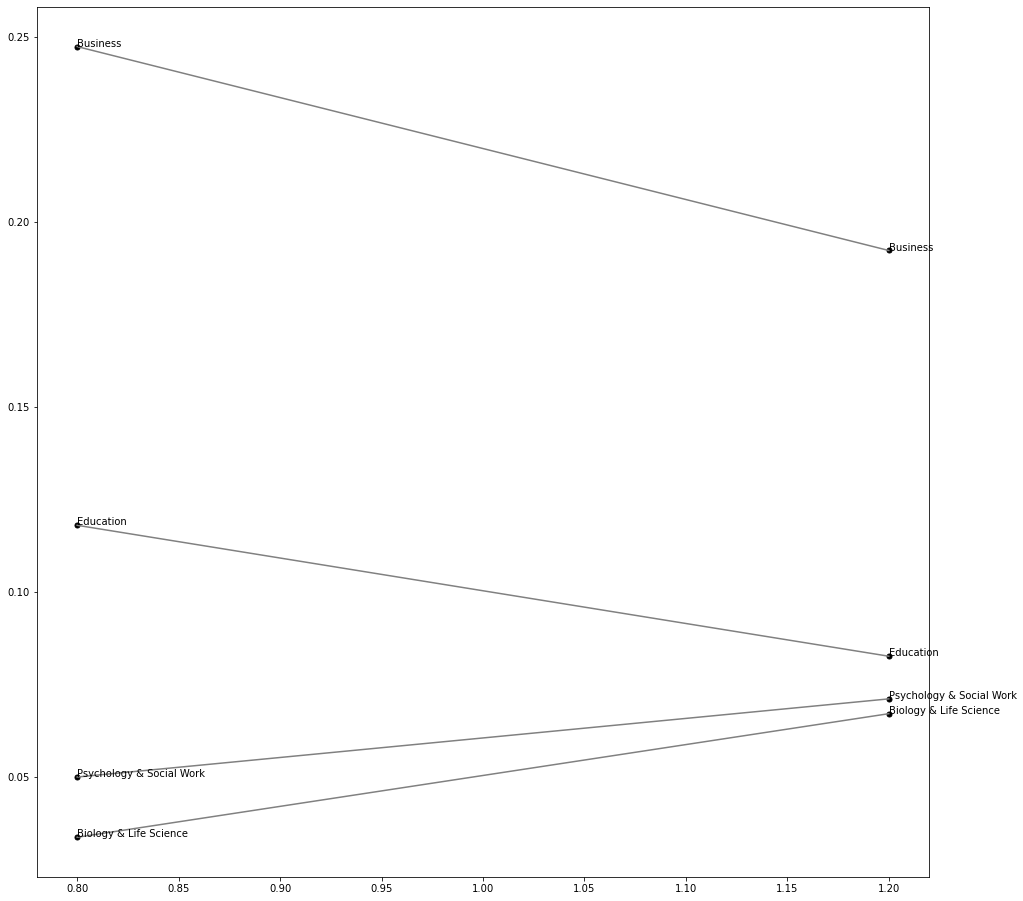

In [507]:
# res_recent = []
# for i in recent_grads.groupby("Major_category").sum()["Total"]:
#     res_recent.append(i/recent_grads["Total"].sum())

res_recent_g = []
for i in recent_grads.groupby("Major_category").sum()["Total"]:
    res_recent_g.append(i/recent_grads["Total"].sum())
x_recent_g = list(zip(list(recent_grads.groupby("Major_category").sum()["Total"].to_frame().reset_index()["Major_category"]),
            res_recent_g))
res_overall_g = []
for i in all_ages.groupby("Major_category").sum()["Total"]:
    res_overall_g.append(i/all_ages["Total"].sum())
x_overall_g = list(zip(list(all_ages.groupby("Major_category").sum()["Total"].to_frame().reset_index()["Major_category"]),
            res_overall_g))
final_g = []
for n in range(len(x_recent_g)):
    final_g.append((x_recent_g[n][0],x_overall_g[n][1],x_recent_g[n][1]))
percentage_g = pd.DataFrame(final_g)
percentage_g.columns = ["Major_category","Proportion_overall","Proportion_recent"]
percentage_g["Change"] = percentage_g.apply(change,axis = 1)
percentage_g["Perc_change"] = percentage_g.apply(perc_change,axis = 1)
sig_g = percentage_g.sort_values('Change')[abs(percentage_g["Change"]) > abs(percentage_g["Change"]).mean()]
# sig_g = sig_g.sort_values('Change')[abs(sig_g["Change"]) > abs(sig_g["Change"]).mean()]
z_g = list(zip(sig_g["Major_category"],sig_g["Proportion_overall"],sig_g["Proportion_recent"],sig_g["Perc_change"],sig_g["Change"]))
points_g = [(n[0],n[1],n[2],n[3],n[4]) for n  in z_g ]

fig, ax = plt.subplots(figsize=(16, 16))
i = 1
for tup in points_g:
    b = tup[1]
    e = tup[2]
    
    x1 = i - 0.2
    x2 = i + 0.2
    #print(x1,x2)

    ax.plot([x1, x2], [b, e], c='gray')

    # Plot the points
    ax.scatter(x1, b, c='k',
               s=25)
    ax.scatter(x2, e, c='k',
               s=25)
    
    plt.annotate(tup[0], (x1, b))
    plt.annotate(tup[0], (x2, e))






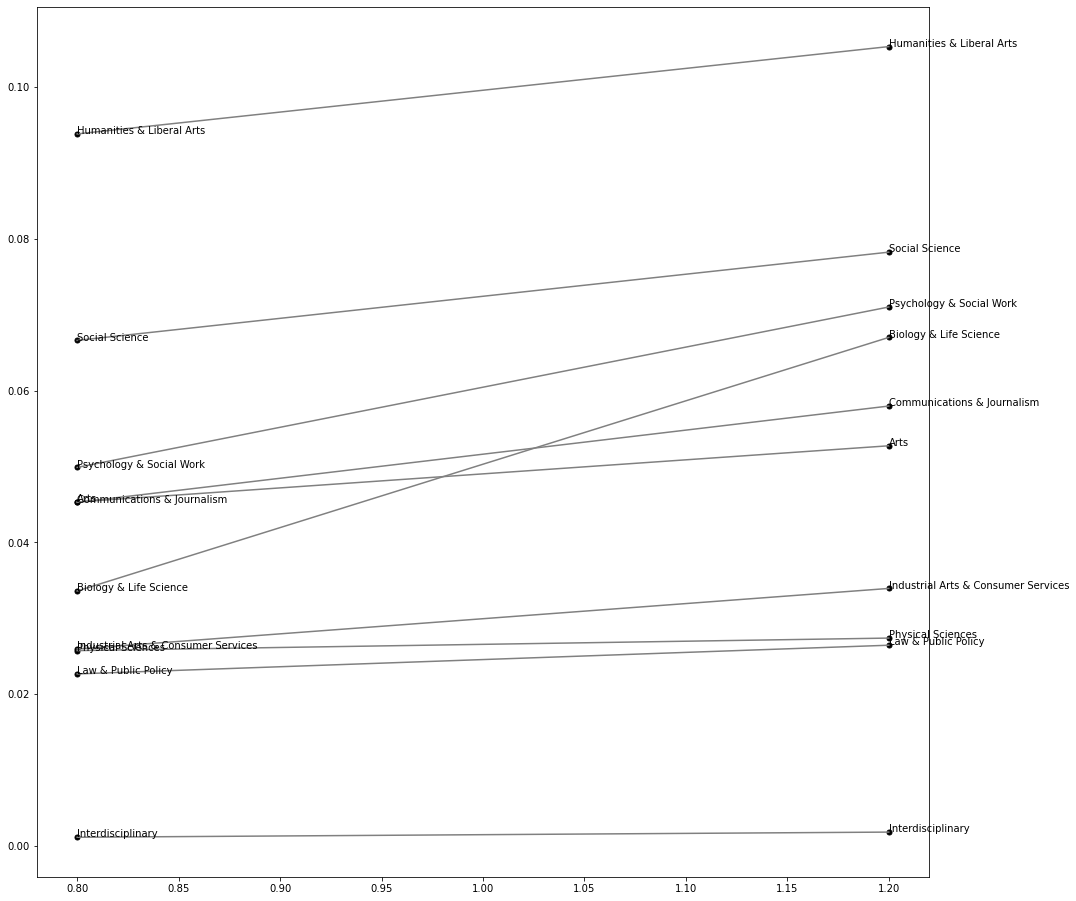

In [516]:
percentage_g_p = percentage_g[percentage_g["Change"] > 0]
z_gg = list(zip(percentage_g_p["Major_category"],percentage_g_p["Proportion_overall"],
                percentage_g_p["Proportion_recent"],percentage_g_p["Perc_change"],percentage_g_p["Change"]))
points_gg = [(n[0],n[1],n[2],n[3],n[4]) for n  in z_gg ]

fig, ax = plt.subplots(figsize=(16, 16))
i = 1
for tup in points_gg:
    b = tup[1]
    e = tup[2]
    
    x1 = i - 0.2
    x2 = i + 0.2
    #print(x1,x2)

    ax.plot([x1, x2], [b, e], c='gray')

    # Plot the points
    ax.scatter(x1, b, c='k',
               s=25)
    ax.scatter(x2, e, c='k',
               s=25)
    
    plt.annotate(tup[0], (x1, b))
    plt.annotate(tup[0], (x2, e))



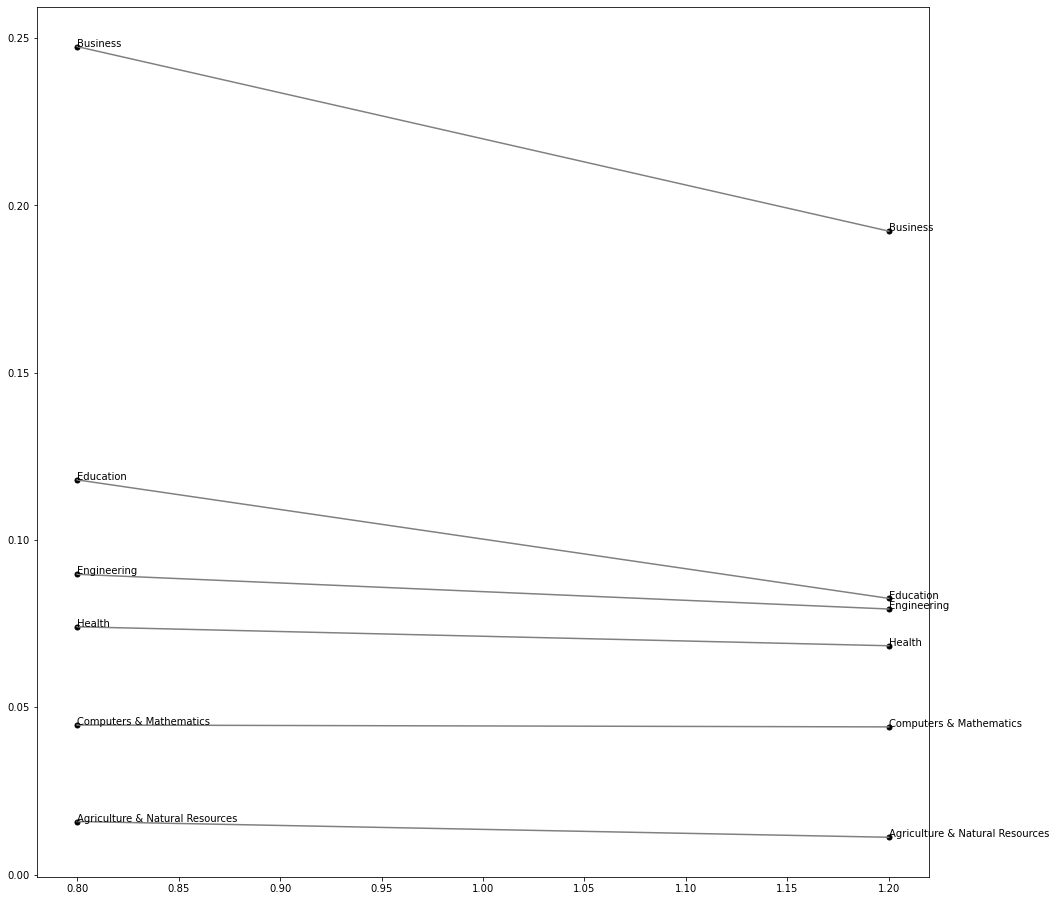

In [514]:
percentage_g_n = percentage_g[percentage_g["Change"] < 0]
z_gg = list(zip(percentage_g_n["Major_category"],percentage_g_n["Proportion_overall"],
                percentage_g_n["Proportion_recent"],percentage_g_n["Perc_change"],percentage_g_n["Change"]))
points_gg = [(n[0],n[1],n[2],n[3],n[4]) for n  in z_gg ]

fig, ax = plt.subplots(figsize=(16, 16))
i = 1
for tup in points_gg:
    b = tup[1]
    e = tup[2]
    
    x1 = i - 0.2
    x2 = i + 0.2
    #print(x1,x2)

    ax.plot([x1, x2], [b, e], c='gray')

    # Plot the points
    ax.scatter(x1, b, c='k',
               s=25)
    ax.scatter(x2, e, c='k',
               s=25)
    
    plt.annotate(tup[0], (x1, b))
    plt.annotate(tup[0], (x2, e))




In [508]:
sig_g

,Major_category,Proportion_overall,Proportion_recent,Change,Perc_change
3,Business,0.247493,0.192328,-0.055166,-0.222897
6,Education,0.117991,0.082569,-0.035422,-0.300212
14,Psychology & Social Work,0.049888,0.071032,0.021144,0.423824
2,Biology & Life Science,0.033594,0.067024,0.033430,0.995128


In [413]:
# x_recent = list(zip(list(recent_grads.groupby("Major_category").sum()["Total"].to_frame().reset_index()["Major_category"]),
# res_recent))
x_recent = list(zip(list(recent_grads.groupby("Major").sum()["Total"].to_frame().reset_index()["Major"]),
res_recent))



In [424]:
len(x_recent)

173

In [430]:
x_overall = list(zip(list(all_ages.groupby("Major").sum()["Total"].to_frame().reset_index()["Major"]),
res_overall))

In [432]:
final = []
for n in range(len(x_recent)):
    final.append((x_recent[n][0],x_overall[n][1],x_recent[n][1]))

In [433]:
percentage = pd.DataFrame(final)
percentage.columns = ["Major","Proportion_overall","Proportion_recent"]

In [434]:
def change(row):
    return row["Proportion_recent"] - row["Proportion_overall"]

In [435]:
def perc_change(row):
   # print(row["Proportion_recent"]/row["Proportion_overall"])
    return ((row["Proportion_recent"] -row["Proportion_overall"])/row["Proportion_overall"])

In [436]:
perc_change(percentage.iloc[0])

-0.34327206080845873

In [437]:
percentage.iloc[0]

Major                 ACCOUNTING
Proportion_overall     0.0446654
Proportion_recent       0.029333
Name: 0, dtype: object

In [438]:
percentage["Change"] = percentage.apply(change,axis = 1)
percentage["Perc_change"] = percentage.apply(perc_change,axis = 1)

In [493]:
sig = percentage.sort_values('Change')[abs(percentage["Change"]) > abs(percentage["Change"]).mean()]
sig = sig.sort_values('Change')[abs(sig["Change"]) > abs(sig["Change"]).mean()]

In [494]:
sig

,Major,Proportion_overall,Proportion_recent,Change,Perc_change
22,BUSINESS MANAGEMENT AND ADMINISTRATION,0.078412,0.048722,-0.029691,-0.378647
70,GENERAL BUSINESS,0.053941,0.034643,-0.019298,-0.357764
0,ACCOUNTING,0.044665,0.029333,-0.015332,-0.343272
71,GENERAL EDUCATION,0.036121,0.021223,-0.014898,-0.412438
135,NURSING,0.044431,0.030922,-0.013509,-0.304045
55,ELEMENTARY EDUCATION,0.036318,0.025232,-0.011086,-0.305247
31,COMMUNICATIONS,0.024795,0.031602,0.006807,0.274543
150,POLITICAL SCIENCE AND GOVERNMENT,0.018802,0.026968,0.008167,0.434359
145,PHYSICAL FITNESS PARKS RECREATION AND LEISURE,0.008797,0.018470,0.009674,1.099691
18,BIOLOGY,0.021074,0.041454,0.020380,0.967084


In [497]:
z = list(zip(sig["Major"],sig["Proportion_overall"],sig["Proportion_recent"],sig["Perc_change"],sig["Change"]))
points = [(n[0],n[1],n[2],n[3],n[4]) for n  in z ]

In [474]:
sig_p = sig[sig["Change"] > 0]

In [496]:
sig_n.sort_values("Change")

,Major,Proportion_overall,Proportion_recent,Change,Perc_change
22,BUSINESS MANAGEMENT AND ADMINISTRATION,0.078412,0.048722,-0.029691,-0.378647
70,GENERAL BUSINESS,0.053941,0.034643,-0.019298,-0.357764
0,ACCOUNTING,0.044665,0.029333,-0.015332,-0.343272
71,GENERAL EDUCATION,0.036121,0.021223,-0.014898,-0.412438
135,NURSING,0.044431,0.030922,-0.013509,-0.304045
55,ELEMENTARY EDUCATION,0.036318,0.025232,-0.011086,-0.305247


In [475]:
sig_n = sig[sig["Change"] < 0]

In [490]:
sig_n.sort_values("Change")

,Major,Proportion_overall,Proportion_recent,Change,Perc_change
22,BUSINESS MANAGEMENT AND ADMINISTRATION,0.078412,0.048722,-0.029691,-0.378647
70,GENERAL BUSINESS,0.053941,0.034643,-0.019298,-0.357764
0,ACCOUNTING,0.044665,0.029333,-0.015332,-0.343272
71,GENERAL EDUCATION,0.036121,0.021223,-0.014898,-0.412438
135,NURSING,0.044431,0.030922,-0.013509,-0.304045
55,ELEMENTARY EDUCATION,0.036318,0.025232,-0.011086,-0.305247


In [481]:
z_p = list(zip(sig_p["Major"],sig_p["Proportion_overall"],sig_p["Proportion_recent"],sig_p["Perc_change"],sig_p["Change"]))
points_p = [(n[0],n[1],n[2],n[3],n[4]) for n  in z_p ]

In [482]:
points_p

[('COMMUNICATIONS',
  0.024794550679540832,
  0.031601732752441276,
  0.2745434737205129,
  0.0068071820729004445),
 ('POLITICAL SCIENCE AND GOVERNMENT',
  0.018801740144284346,
  0.02696844818119768,
  0.4343591590056084,
  0.008166708036913335),
 ('PHYSICAL FITNESS PARKS RECREATION AND LEISURE',
  0.008796643544104771,
  0.018470228986891532,
  1.0996905119873464,
  0.00967358544278676),
 ('BIOLOGY',
  0.02107359574004357,
  0.041453535576389464,
  0.967084122128261,
  0.020379939836345895),
 ('PSYCHOLOGY',
  0.03725611718796403,
  0.058144583287923456,
  0.5606721171337644,
  0.020888466099959424)]

In [483]:
z_n = list(zip(sig_n["Major"],sig_n["Proportion_overall"],sig_n["Proportion_recent"],sig_n["Perc_change"],sig_n["Change"]))
points_n = [(n[0],n[1],n[2],n[3],n[4]) for n  in z_n ]

In [484]:
points_n

[('BUSINESS MANAGEMENT AND ADMINISTRATION',
  0.07841238117869888,
  0.04872177462108962,
  -0.37864691916376675,
  -0.02969060655760926),
 ('GENERAL BUSINESS',
  0.05394111892942376,
  0.034642939524080825,
  -0.3577637948258463,
  -0.01929817940534294),
 ('ACCOUNTING',
  0.044665391955967304,
  0.029333010812424853,
  -0.34327206080845873,
  -0.015332381143542451),
 ('GENERAL EDUCATION',
  0.03612121865127722,
  0.02122347066167291,
  -0.4124375795133241,
  -0.014897747989604315),
 ('NURSING',
  0.044431247586570785,
  0.030922135123856002,
  -0.3040453103729159,
  -0.013509112462714783),
 ('ELEMENTARY EDUCATION',
  0.036317882850896856,
  0.025231944809938605,
  -0.3052473649543833,
  -0.01108593804095825)]

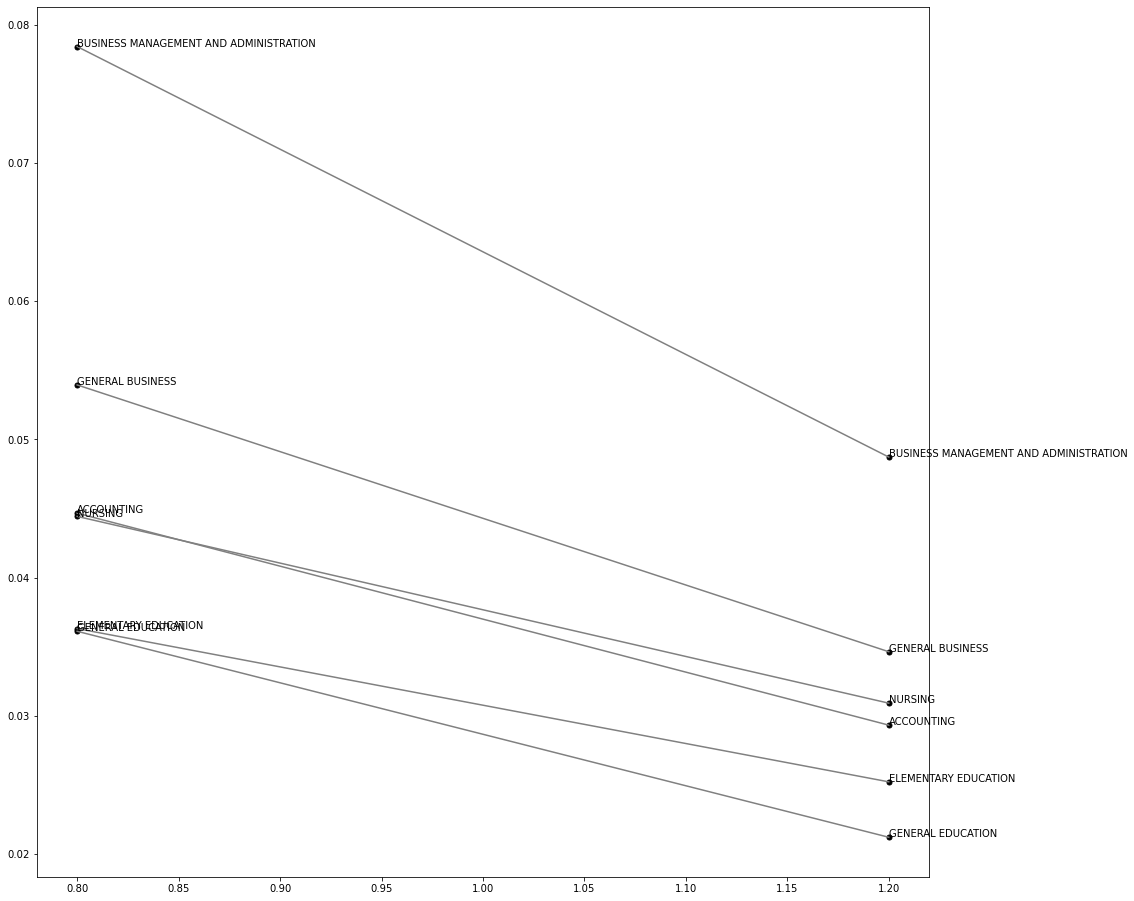

In [487]:
fig, ax = plt.subplots(figsize=(16, 16))
i = 1
for tup in points_n:
    b = tup[1]
    e = tup[2]
    
    x1 = i - 0.2
    x2 = i + 0.2
    #print(x1,x2)

    ax.plot([x1, x2], [b, e], c='gray')

    # Plot the points
    ax.scatter(x1, b, c='k',
               s=25, label='BOY F&P Score')
    ax.scatter(x2, e, c='k',
               s=25, label='EOY F&P Score')
    
    plt.annotate(tup[0], (x1, b))
    plt.annotate(tup[0], (x2, e))



    # Update x-axis
#     i += 1

# Fix the axes and labels
#     ax.set_xticks([1])
# _ = ax.set_xticklabels([5,6], fontsize='x-large')





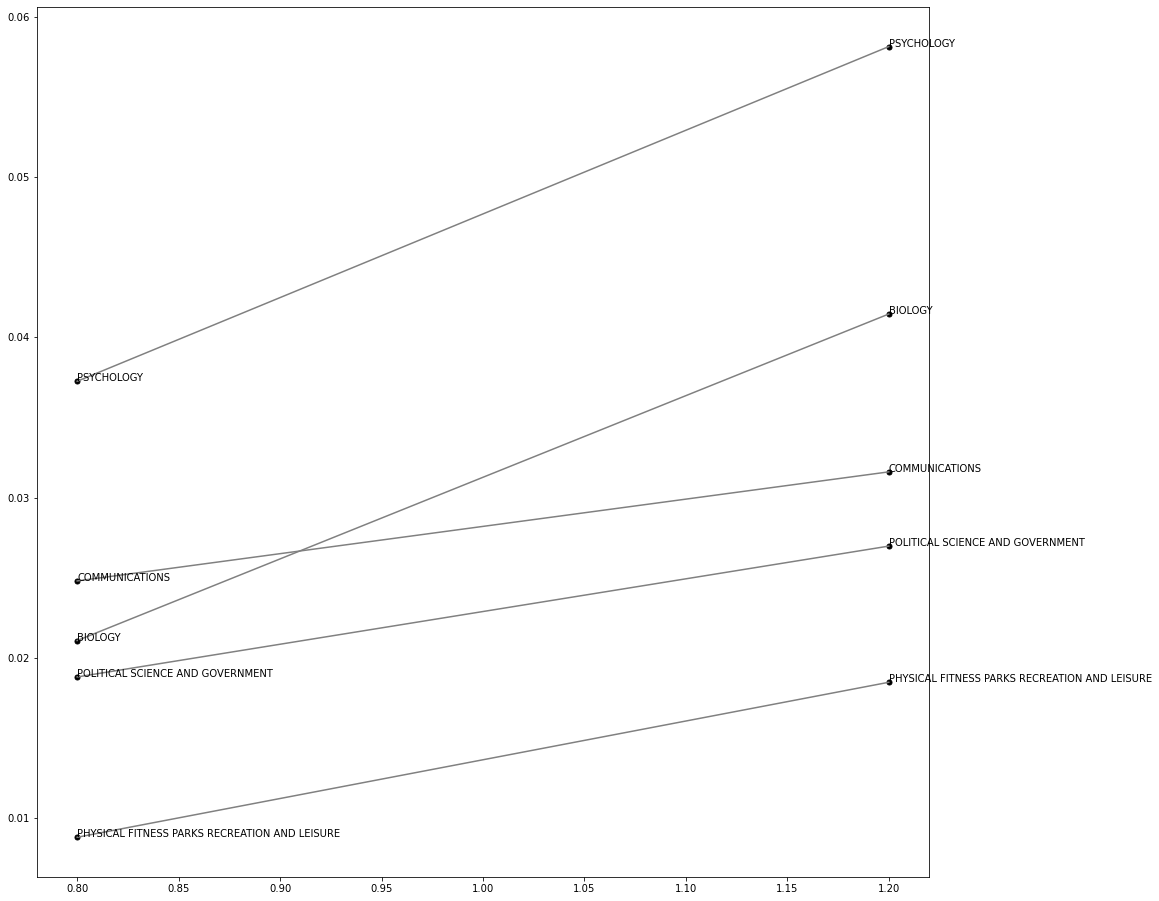

In [488]:
fig, ax = plt.subplots(figsize=(16, 16))
i = 1
for tup in points_p:
    b = tup[1]
    e = tup[2]
    
    x1 = i - 0.2
    x2 = i + 0.2
    #print(x1,x2)

    ax.plot([x1, x2], [b, e], c='gray')

    # Plot the points
    ax.scatter(x1, b, c='k',
               s=25, label='BOY F&P Score')
    ax.scatter(x2, e, c='k',
               s=25, label='EOY F&P Score')
    
    plt.annotate(tup[0], (x1, b))
    plt.annotate(tup[0], (x2, e))



    # Update x-axis
#     i += 1

# Fix the axes and labels
#     ax.set_xticks([1])
# _ = ax.set_xticklabels([5,6], fontsize='x-large')






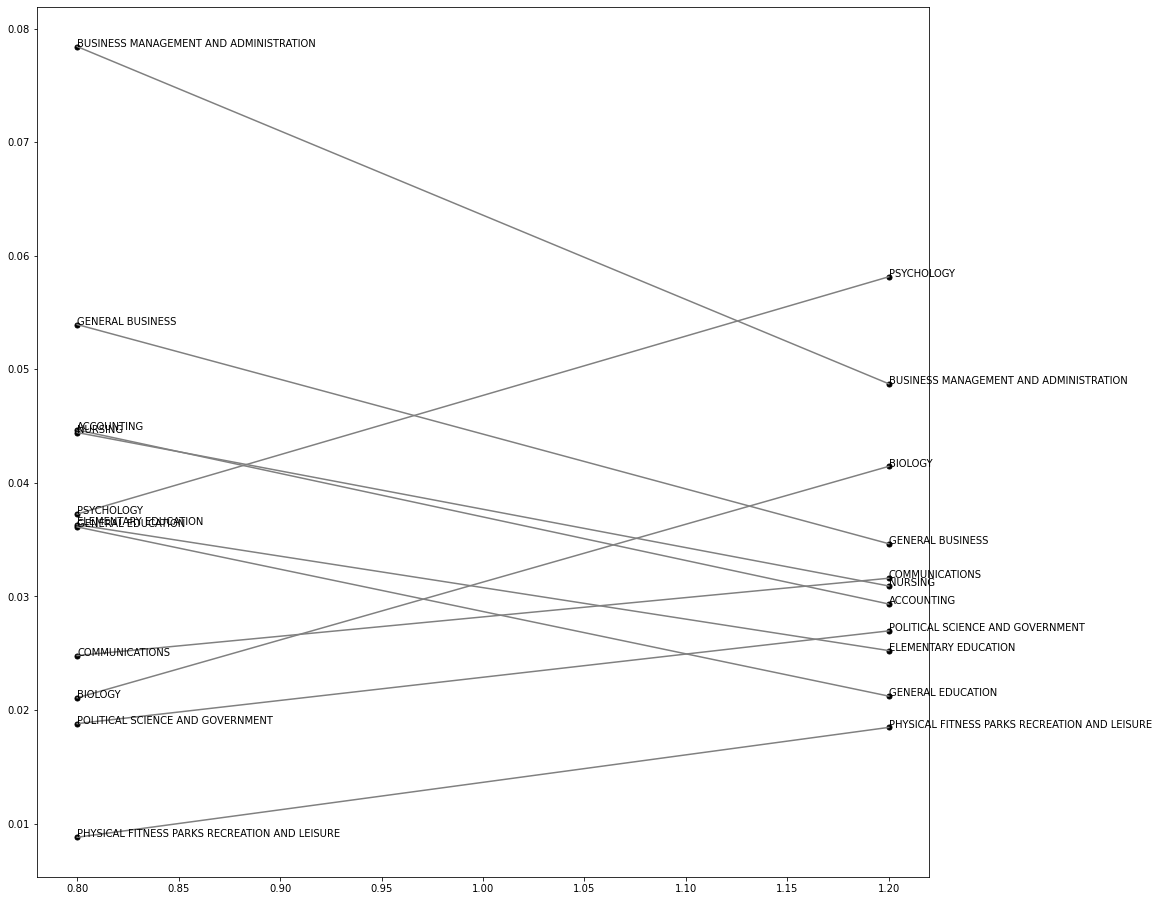

In [498]:
fig, ax = plt.subplots(figsize=(16, 16))
i = 1
for tup in points:
    b = tup[1]
    e = tup[2]
    
    x1 = i - 0.2
    x2 = i + 0.2
    #print(x1,x2)

    ax.plot([x1, x2], [b, e], c='gray')

    # Plot the points
    ax.scatter(x1, b, c='k',
               s=25, label='BOY F&P Score')
    ax.scatter(x2, e, c='k',
               s=25, label='EOY F&P Score')
    
    plt.annotate(tup[0], (x1, b))
    plt.annotate(tup[0], (x2, e))



    # Update x-axis
#     i += 1

# Fix the axes and labels
#     ax.set_xticks([1])
# _ = ax.set_xticklabels([5,6], fontsize='x-large')







In [290]:
x_overall = list(zip(list(all_ages.groupby("Major_category").sum()["Total"].to_frame().reset_index()["Major_category"]),
res_overall))

In [229]:
all_ages.groupby("Major_category").sum()["Total"]

Major_category
Agriculture & Natural Resources         632437
Arts                                   1805865
Biology & Life Science                 1338186
Business                               9858741
Communications & Journalism            1803822
Computers & Mathematics                1781378
Education                              4700118
Engineering                            3576013
Health                                 2950859
Humanities & Liberal Arts              3738335
Industrial Arts & Consumer Services    1033798
Interdisciplinary                        45199
Law & Public Policy                     902926
Physical Sciences                      1025318
Psychology & Social Work               1987278
Social Science                         2654125
Name: Total, dtype: int64

In [224]:
all_ages["Total"].sum()

39834398

In [ ]:
newgrads = pd.read_csv("majordata/recent-grads.csv")
newgrads.sort_values("Major_code", ascending = True)
totalgradsnew = newgrads['Total'].sum() 
newgrads['Proportion'] = newgrads['Total']/totalgradsnew
newprops = newgrads[["Major","Proportion"]]
newprops.rename(columns={'Proportion':'Proportion of recent graduates'}, inplace=True)
totalprops = majordata[["Major","Proportion"]]
merged_data = pd.merge(left=totalprops,right=newprops, how='left', left_on='Major', right_on='Major')
merged_data["Shift"] = merged_data["Proportion of recent graduates"] - merged_data['Proportion']
merged_data.rename(columns={'Proportion':'Proportion of all graduates'}, inplace=True)